# Visualizing the sky background noise

Sky background (Earthshine + zodiacal light) data from
[pysynphot](https://github.com/spacetelescope/pysynphot/tree/925cdbac35a7851cee1bddaa2b47651235c44851/pysynphot/data/generic)


In [1]:
# I only need the following line since I'm using remote VS Code
%cd "/arc/home/IsaacCheng/CASTOR/ETC/notebooks"

import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from IPython.core.display import display

# Import my own modules
import sys
sys.path.append("../")
from castor_etc import filepaths as fp
from castor_etc.conversions import convert_electron_flux_mag
from castor_etc import parameters as params
from castor_etc import constants as const

/arc/home/IsaacCheng/CASTOR/ETC/notebooks


In [2]:
earthshine, earthshine_header = fits.getdata(
    fp.DATAPATH + "/background/earthshine.fits", header=True
)
print(earthshine.field(0))
print(earthshine.field(1))
zodi, zodi_header = fits.getdata(fp.DATAPATH + "/background/zodi.fits", header=True)
print(zodi.field(0))
print(zodi.field(1))


[ 1000.  1001.  1002. ... 24960. 24980. 25000.]
[2.413579e-23 2.868297e-23 3.322108e-23 ... 6.974366e-20 6.947341e-20
 6.969851e-20]
[ 1000.  1001.  1002. ... 24960. 24980. 25000.]
[4.74299600e-29 4.86987600e-29 4.99646100e-29 ... 9.88339305e-20
 9.87173890e-20 9.88148235e-20]


In [3]:
display(earthshine_header)
print()
display(zodi_header)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                 4171                                                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2                                                  
TTYPE1  = 'Wavelength'         / label for field   1                            
TFORM1  = '1E      '           / data format of field: 4-byte REAL              
TUNIT1  = 'Angstroms'          / physical unit of field                         
TTYPE2  = 'FLUX    '           / label for field   2                            
TFORM2  = '1D      '        

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                 4171                                                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2                                                  
TTYPE1  = 'WAVELENGTH'         / label for field   1                            
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'Angstroms'          / physical unit of field                         
TTYPE2  = 'FLUX    '           / label for field   2                            
TFORM2  = '1D      '        

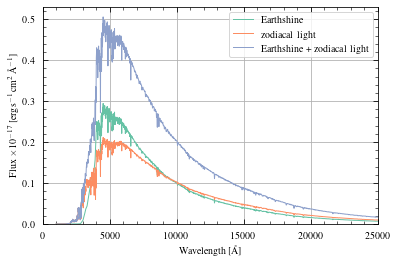

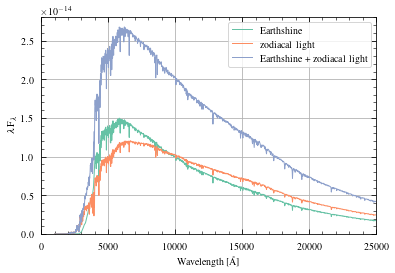

In [4]:
fig, ax = plt.subplots()
ax.plot(earthshine.field(0), earthshine.field(1) * 1e17, lw=1, label="Earthshine")
ax.plot(zodi.field(0), zodi.field(1) * 1e17, lw=1, label="zodiacal light")
ax.plot(
    earthshine.field(0),
    (earthshine.field(1) + zodi.field(1)) * 1e17,
    lw=1,
    label="Earthshine + zodiacal light",
)
ax.set_xlabel(r"Wavelength [\AA]")
ax.set_ylabel(r"Flux $\times 10^{-17}$ [$\rm erg\,s^{-1}\,cm^2\,$\AA$^{-1}$]")
ax.legend()
# ax.set_xlim(2000, 17000)
ax.set_xlim(0, 25000)
ax.set_ylim(bottom=0)
# fig.savefig(fp.OUTPATH + "sky_background.pdf")
plt.show()


fig, ax = plt.subplots()
ax.plot(earthshine.field(0), earthshine.field(1) * earthshine.field(0), lw=1, label="Earthshine")
ax.plot(zodi.field(0), zodi.field(1) * zodi.field(0), lw=1, label="zodiacal light")
ax.plot(
    earthshine.field(0),
    (earthshine.field(1) + zodi.field(1)) * earthshine.field(0),
    lw=1,
    label="Earthshine + zodiacal light",
)
ax.set_xlabel(r"Wavelength [\AA]")
ax.set_ylabel(r"$\lambda {\rm F_\lambda}$")
ax.legend()
# ax.set_xlim(2000, 17000)
ax.set_xlim(0, 25000)
ax.set_ylim(bottom=0)
# fig.savefig(fp.OUTPATH + "sky_background.pdf")
plt.show()  # same as nu * fnu. Good

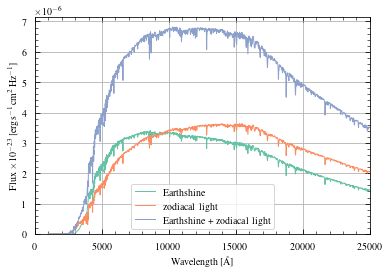

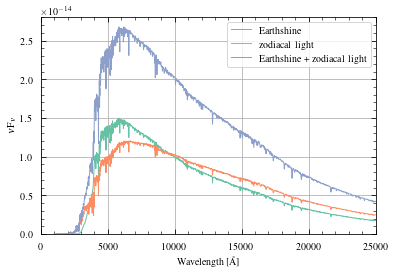

In [3]:
es_fnu = convert_electron_flux_mag(earthshine.field(1), "flam", "fnu", wavelengths=earthshine.field(0))[0]
zodi_fnu = convert_electron_flux_mag(zodi.field(1), "flam", "fnu", wavelengths=zodi.field(0))[0]
hz = const.LIGHTSPEED.to(u.AA/u.s).value / earthshine.field(0)

fig, ax = plt.subplots()
ax.plot(earthshine.field(0), es_fnu * 1e23, lw=1, label="Earthshine")
ax.plot(zodi.field(0), zodi_fnu * 1e23, lw=1, label="zodiacal light")
ax.plot(
    earthshine.field(0),
    (es_fnu + zodi_fnu) * 1e23,
    lw=1,
    label="Earthshine + zodiacal light",
)
ax.set_xlabel(r"Wavelength [\AA]")
ax.set_ylabel(r"Flux $\times 10^{-23}$ [$\rm erg\,s^{-1}\,cm^2\,Hz^{-1}$]")
ax.legend()
# ax.set_xlim(2000, 17000)
ax.set_xlim(0, 25000)
ax.set_ylim(bottom=0)
plt.show()

fig, ax = plt.subplots()
ax.plot(earthshine.field(0), hz * es_fnu, lw=1, label="Earthshine")
ax.plot(zodi.field(0), hz * zodi_fnu, lw=1, label="zodiacal light")
ax.plot(
    earthshine.field(0),
    (es_fnu + zodi_fnu) * hz,
    lw=1,
    label="Earthshine + zodiacal light",
)
ax.set_xlabel(r"Wavelength [\AA]")
ax.set_ylabel(r"$\nu {\rm F_\nu}$")
ax.legend()
# ax.set_xlim(2000, 17000)
ax.set_xlim(0, 25000)
ax.set_ylim(bottom=0)
plt.show()  # same as lambda * flam. Good


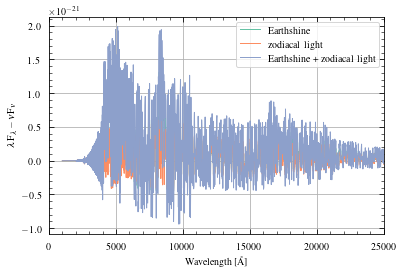

In [6]:
fig, ax = plt.subplots()
ax.plot(
    earthshine.field(0),
    (earthshine.field(1) * earthshine.field(0)) - (hz * es_fnu),
    lw=1,
    label="Earthshine",
)
ax.plot(
    zodi.field(0),
    (zodi.field(1) * zodi.field(0)) - (hz * zodi_fnu),
    lw=1,
    label="zodiacal light",
)
ax.plot(
    earthshine.field(0),
    ((earthshine.field(1) + zodi.field(1)) * earthshine.field(0))
    - (hz * (es_fnu + zodi_fnu)),
    lw=1,
    label="Earthshine + zodiacal light",
)
ax.set_xlabel(r"Wavelength [\AA]")
ax.set_ylabel(r"$\lambda {\rm F_\lambda} - \nu {\rm F_\nu}$")
ax.legend()
# ax.set_xlim(2000, 17000)
ax.set_xlim(0, 25000)
plt.show()


(From the plots above, we know that the conversion between flam and fnu is correct.)


In [7]:
tot_fnu = dict.fromkeys(params.PASSBAND_LIMITS)
tot_ab = dict.fromkeys(params.PASSBAND_LIMITS)
for band, lim in params.PASSBAND_LIMITS.items():
    lim = lim.to(u.AA).value
    is_in_passband = (earthshine.field(0) >= lim[0]) & (earthshine.field(0) <= lim[1])
    num_in_passband = np.sum(is_in_passband)
    sum_fnu = np.nansum(es_fnu[is_in_passband] + zodi_fnu[is_in_passband]) / (num_in_passband)
    tot_fnu[band] = sum_fnu
    tot_ab[band] = convert_electron_flux_mag(sum_fnu, "fnu", "mag")[0]
print(tot_fnu)
print(tot_ab)

{'uv': 3.6173333598845187e-31, 'u': 8.069441494330824e-30, 'g': 3.345995392157472e-29}
{'uv': 27.504028666105974, 'u': 24.132891307037447, 'g': 22.588686653623817}


Comparing the flam to fnu to AB mag conversion above to the results in `background.py`,
we know the use of the pivot wavelength to convert total flam to total fnu is correct.

Furthermore, it is clear from inspection of the code in `conversions.py` that the
conversion from fnu to AB mag is correct.

Conclusion: our sky background spectrum is much higher than the estimates used in the
CASTOR SMS?


In [7]:
tot_fnu = dict.fromkeys(params.PASSBAND_LIMITS)
tot_ab = dict.fromkeys(params.PASSBAND_LIMITS)
for band, lim in params.PASSBAND_LIMITS.items():
    lim = lim.to(u.AA).value
    is_in_passband = (earthshine.field(0) >= lim[0]) & (earthshine.field(0) <= lim[1])
    num_in_passband = np.sum(is_in_passband)
    sum_fnu = 0
    sum_fnu += np.nansum(es_fnu[is_in_passband]) / (num_in_passband)
    sum_fnu += np.nansum(zodi_fnu[is_in_passband]) / (num_in_passband)
    # sum_fnu += np.nanmean(es_fnu[is_in_passband])
    # sum_fnu += np.nanmean(zodi_fnu[is_in_passband])
    tot_fnu[band] = sum_fnu
    tot_ab[band] = convert_electron_flux_mag(sum_fnu, "fnu", "mag")[0]
print(tot_fnu)
print(tot_ab)

{'uv': 3.6173333598845182e-31, 'u': 8.069441494330824e-30, 'g': 3.3459953921574716e-29}
{'uv': 27.504028666105974, 'u': 24.132891307037447, 'g': 22.588686653623817}


In [11]:
tot_flam = dict.fromkeys(params.PASSBAND_LIMITS)
tot_ab = dict.fromkeys(params.PASSBAND_LIMITS)
tot_ab_flam_to_fnu = dict.fromkeys(params.PASSBAND_LIMITS)
for band, lim in params.PASSBAND_LIMITS.items():
    lim = lim.to(u.AA).value
    is_in_passband = (earthshine.field(0) >= lim[0]) & (earthshine.field(0) <= lim[1])
    num_in_passband = np.sum(is_in_passband)
    sum_flam = 0
    sum_flam += np.nanmean(earthshine.field(1)[is_in_passband])
    sum_flam += np.nanmean(zodi.field(1)[is_in_passband])
    # sum_fnu /= num_in_passband
    tot_flam[band] = sum_flam
    tot_ab[band] = convert_electron_flux_mag(sum_flam, "flam", "mag", wavelengths=params.PASSBAND_PIVOTS[band])[0]
    tmp_fnu = convert_electron_flux_mag(sum_flam, "flam", "fnu", wavelengths=params.PASSBAND_PIVOTS[band])[0]
    tot_ab_flam_to_fnu[band] = convert_electron_flux_mag(tmp_fnu, "fnu", "mag")[0]
print(tot_flam)
print(tot_ab)
print(tot_ab_flam_to_fnu)

{'uv': 1.4359270998374905e-19, 'u': 1.8534644629270733e-18, 'g': 4.425082868914956e-18}
{'uv': 27.92867858184143, 'u': 24.232995623010943, 'g': 22.580108753807103}
{'uv': 27.92867858184143, 'u': 24.232995623010943, 'g': 22.580108753807103}


In [1]:
from scipy.integrate import simpson

In [ ]:
tot_fnu = dict.fromkeys(params.PASSBAND_LIMITS)
tot_ab = dict.fromkeys(params.PASSBAND_LIMITS)
for band, lim in params.PASSBAND_LIMITS.items():
    lim = lim.to(u.AA).value
    is_in_passband = (earthshine.field(0) >= lim[0]) & (earthshine.field(0) <= lim[1])
    sum_fnu = simpson(y=es_fnu[is_in_passband], x=earthshine.field(0)[is_in_passband], even="avg")
    tot_fnu[band] = sum_fnu
    tot_ab[band] = convert_electron_flux_mag(sum_fnu, "fnu", "mag")[0]
print(tot_fnu)
print(tot_ab)